In [1]:
# Nạp các gói thư viện cần thiết 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 1. Chuẩn bị dữ liệu

In [2]:
# Đọc dữ liệu từ tập tin csv
df = pd.read_csv('https://raw.githubusercontent.com/ltdaovn/dataset/master/ABC_customerSpending.csv')

In [3]:
# Thống kê tổng giá trị theo "PRODUCT_CATE" ứng với "CUST_ID".
dfSummary = pd.pivot_table(data = df, 
                            values = ['ORDER_COST', 'ORDER_ID'],
                            index = ['CUST_ID'],
                            columns = ['PRODUCT_CATE'],
                            aggfunc= {'ORDER_COST': np.sum}
                          )

print(dfSummary.shape)
dfSummary.head()

(75041, 9)


ORDER_COST                                         \
PRODUCT_CATE    MẸ & BÉ NHÀ CỬA & ĐỜI SỐNG Sách, VPP & Âm nhạc   
CUST_ID                                                          
CUS0000000          NaN                NaN                 NaN   
CUS0000001          NaN                NaN                 NaN   
CUS0000002          NaN                NaN                 NaN   
CUS0000003          NaN           646512.0                 NaN   
CUS0000004          NaN                NaN                 NaN   

                                                                      \
PRODUCT_CATE SỨC KHỎE & SẮC ĐẸP THỜI TRANG THỰC PHẨM Voucher dịch vụ   
CUST_ID                                                                
CUS0000000                  NaN        NaN       NaN             NaN   
CUS0000001                  NaN        NaN       NaN             NaN   
CUS0000002             152000.0        NaN  955000.0             NaN   
CUS0000003             822226.0        NaN  460162.0             NaN   
CUS0000004                  NaN        NaN  343000.0             NaN   

                                                                
PRODUCT_CATE Vé máy bay – Dịch vụ đặt chỗ ĐIỆN MÁY & CÔNG NGHỆ  
CUST_ID                                                         
CUS0000000                            NaN           20780000.0  
CUS0000001                            NaN              50000.0  
CUS0000002                            NaN                  NaN  
CUS0000003                            NaN                  NaN  
CUS0000004                            NaN                  NaN

In [4]:
from sklearn.preprocessing import StandardScaler

dfSummary.fillna(0, inplace = True)

scaler = StandardScaler()
scaler.fit(dfSummary)
X = scaler.transform(dfSummary)

In [5]:
from sklearn.manifold import TSNE
import time
# time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 75041 samples in 6.103s...
[t-SNE] Computed neighbors for 75041 samples in 36.650s...
[t-SNE] Computed conditional probabilities for sample 1000 / 75041
[t-SNE] Computed conditional probabilities for sample 2000 / 75041
[t-SNE] Computed conditional probabilities for sample 3000 / 75041
[t-SNE] Computed conditional probabilities for sample 4000 / 75041
[t-SNE] Computed conditional probabilities for sample 5000 / 75041
[t-SNE] Computed conditional probabilities for sample 6000 / 75041
[t-SNE] Computed conditional probabilities for sample 7000 / 75041
[t-SNE] Computed conditional probabilities for sample 8000 / 75041
[t-SNE] Computed conditional probabilities for sample 9000 / 75041
[t-SNE] Computed conditional probabilities for sample 10000 / 75041
[t-SNE] Computed conditional probabilities for sample 11000 / 75041
[t-SNE] Computed conditional probabilities for sample 12000 / 75041
[t-SNE] Computed conditional probabilities for s

In [6]:
from sklearn.cluster import KMeans
k = 8
km2 = KMeans(n_clusters=k, random_state=2020)
y_label = km2.fit_predict(X) #print(y_means)

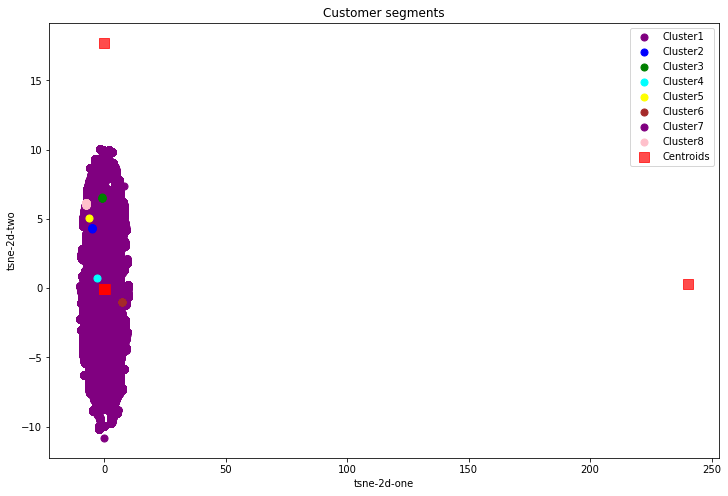

In [8]:
X_  = tsne_results
plt.figure(figsize = (12, 8))
plt.scatter(X_[y_label==0,0],X_[y_label==0,1],s=50, c='purple', label='Cluster1')
plt.scatter(X_[y_label==1,0],X_[y_label==1,1],s=50, c='blue', label='Cluster2')
plt.scatter(X_[y_label==2,0],X_[y_label==2,1],s=50, c='green', label='Cluster3')
plt.scatter(X_[y_label==3,0],X_[y_label==3,1],s=50, c='cyan', label='Cluster4')
plt.scatter(X_[y_label==4,0],X_[y_label==4,1],s=50, c='yellow', label='Cluster5')
plt.scatter(X_[y_label==5,0],X_[y_label==5,1],s=50, c='brown', label='Cluster6')
plt.scatter(X_[y_label==6,0],X_[y_label==6,1],s=50, c='purple', label='Cluster7')
plt.scatter(X_[y_label==7,0],X_[y_label==7,1],s=50, c='pink', label='Cluster8')
plt.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], s=100, marker='s', c='red', alpha=0.7, label='Centroids')
plt.title('Customer segments')
plt.xlabel('tsne-2d-one')
plt.ylabel('tsne-2d-two')
plt.legend()
plt.show()